<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f4f4f4; 
    border-radius: 10px; 
    align-items: center;">

<h1 style="margin: 0; color: #4CAF50;">Supervised ML Modelle: Support-Vector-Machines</h1>
<h2 style="margin: 5px 0; color: #555;">DSAI</h2>
<h3 style="margin: 5px 0; color: #555;">Jakob Eggl</h3>

<div style="flex-shrink: 0;">
    <img src="https://www.htl-grieskirchen.at/wp/wp-content/uploads/2022/11/logo_bildschirm-1024x503.png" alt="Logo" style="width: 250px; height: auto;"/>
</div>
<p1> © 2024/25 Jakob Eggl. Nutzung oder Verbreitung nur mit ausdrücklicher Genehmigung des Autors.</p1>
</div>
<div style="flex: 1;">
</div>   

Teile (adaptiert) von *AI Inside Seminar KI Mag. Otto Reichel*!

## Support Vector Machines (SVM's)

Nun betrachten wir den Support Vector Machine (SVM) Klassifizierer. Es ist eine der am meisten theoretisch fundierten Machine Learning Modelle.

Die SVM $\ldots$
* $\ldots$ wird bei uns verwendet zur Klassifizierung
* $\ldots$ gibt es in 2 Varianten: **Linear SVM** und **Kernel SVM**
* $\ldots$ hat wenige Hyperparameter ($C$ + Parameter für Kernel SVM)

![SVM_Preview_3_Classes](../resources/SVM_Preview.jpg)

(von https://spotintelligence.com/2024/05/06/support-vector-machines-svm/)

## Beschreibung des Algorithmus

SVM's sind Supervised Machine Learning Modelle, die versuchen, Muster in Daten zu erkennen, um die Daten zu klassifizieren. Ähnlich wie beim $k$-Nearest-Neighbour Klassifizierer, erhalten wir auch hier keine Wahrscheinlichkeiten zu bestimmten Klassenzugehörigkeiten, sondern nur die Vorhersage, ob ein bestimmter Datensatz zu einer Klasse gehört oder nicht.

Dabei versuchen SVM's Trennlinien (im mehrdimensionalen Hyperebenen) zwischen den Bereichen so zu legen, dass der leere Bereich (=Streifen, genannt **Margin**) möglichst groß wird. Die folgende Abbildung zeigt dies für 2 klar getrennte Bereiche. In der Praxis ist die Ausgangslage meistens nicht so eindeutig, sprich hier ist es meistens *nicht* möglich, ohne Fehler eine Trennlinie/Hyperebene zu finden.

![SVM_Margin_Visualization](../resources/SVM_Margin.png)

(von https://www.iunera.com/kraken/fabric/support-vector-machines-svm/)

Welche Hyperplane wäre hier die beste?

![SVM_Multiple_Hyperplanes](../resources/SVM_Multiple_Hyperplanes.jpg)

![SVM_Wrong_Hyperplanes](../resources/SVM_Wrong_Hyperplane.jpg)

![SVM_Right_Hyperplanes](../resources/SVM_Right_Hyperplane.jpg)

(von VL: Supervised Machine Learning JKU WS 2022)

Da der Trennbereich so groß wie möglich sein soll, ist klarerweise die letzte Hyperplane die beste.

## Training vs. Inferenz von SVM's

Wir wollen hier nochmal formal festhalten, wie eine Support Vector Machine an den Daten angepasst wird (Training) und wie sie dann verwendet wird.

**Training:**
* Die optimale Hyperebene wird berechnet.
* Je nach Parameter $C$ werden mehr oder weniger Fehlklassifikationen erlaubt

**Verwendung (=Inferenz):**
* Ein neuer Datenpunkt wird in den Raum gesetzt
* Je nachdem, auf welcher Seite der Punkt liegt, bekommt er das Label $1$ oder $0$

## Multiclass SVM

Wie gehen wir vor, wenn wir mehrere Klassen haben?

Hier gibt es *mehrere Möglichkeiten*.

1. **One-vs-One (OvO)**
    * Für $N$ Klassen wird für jede mögliche Paarung von Klassen eine eigene SVM trainiert
    * Das bedeutet, es werden $N\cdot (N-1)/2$​ Klassifikatoren trainiert
    * Vorhersage: Jeder Klassifikator gibt eine Stimme für eine der beiden Klassen ab, und die Klasse mit den meisten Stimmen gewinnt (Mehrheitsentscheidung)
    * Vorteil: Hohe Genauigkeit
    * Nachteil: Teuer (Rechenleistung) bei vielen Klassen

2. **One-vs-All (OvA)**
    * Für $N$ Klassen werden $N$ SVMs trainiert
    * Jede SVM unterscheidet eine Klasse von allen anderen Klassen (z. B. "Ist es Klasse A oder nicht?")
    * Vorhersage: Die SVM mit der höchsten Entscheidungsfunktion bestimmt die Klasse
    * Vorteil: Weniger Modelle als *OvO*
    * Nachteil: Schlechtere Performance bei unausgeglichenen Daten

## Die Support Vektoren

Nachdem dieses Machine Learning Modell *Support Vector Machine* heißt, ist diese Namensgebung zu hinterfragen sehr legitim. Der Name kommt von den sogenannten **Support Vektoren**.

**Support Vektoren** (deutsch: Stützvektoren) sind die Datenpunkte, die am nächsten zur anderen Klasse sind. Diese werden verwendet, um die optimale Hyperebene zu finden. Die Berechnung der Hyperebene werden wir nicht händisch durchmachen, es kann bequem in Python gemacht werden. 

## Der Hyperparameter $C$

* Wird **Regularisierungsparameter** genannt
* Kontrolliert den Trade-off zwischen **Maximierung der Margin** und **Minimierung von Fehlklassifikationen**
* Höheres $C$: Strengere Klassifikation, weniger Fehlklassifikationen erlaubt und somit kleinere Margin
* Niedrigeres $C$: Größere Margin, erlaubt mehr Fehlklassifikationen für bessere Generalisierung

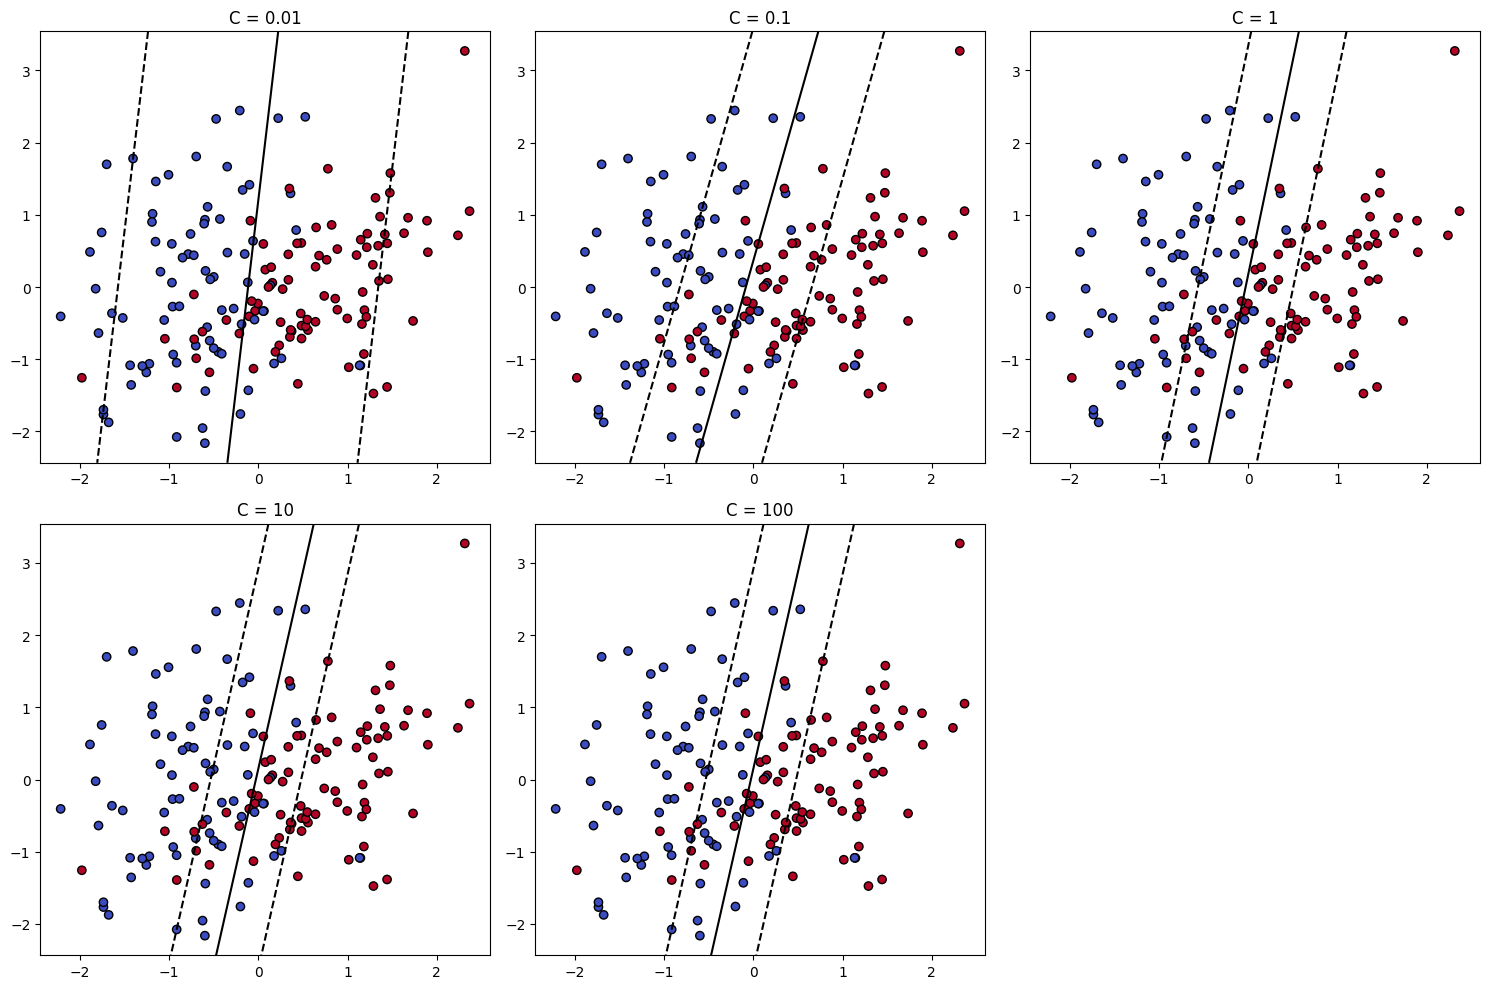

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dummy Dataset erstellen
X, y = make_classification(
    n_samples=200, 
    n_features=2,    # Gesamtzahl der Features
    n_informative=2, 
    n_redundant=0,   # Keine redundanten Features
    n_repeated=0,    # Keine wiederholten Features
    n_classes=2, 
    n_clusters_per_class=1, 
    random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Verschiedene C-Werte testen
C_values = [0.01, 0.1, 1, 10, 100]
plt.figure(figsize=(15, 10))

for i, C in enumerate(C_values, 1):
    model = SVC(C=C, kernel='linear')
    model.fit(X_train, y_train)
    
    # Plot der Entscheidungsgrenze
    plt.subplot(2, 3, i)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
    
    # Grenzen für die Darstellung
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                         np.linspace(ylim[0], ylim[1], 100))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['dashed', 'solid', 'dashed'], colors='black')
    plt.title(f'C = {C}')
    
plt.tight_layout()
plt.show()


Welche Werte von $C$ begünstigen *Overfitting* und welche *Underfitting*?

## Kernel SVM

Als Motivation wird nun folgendes Szenario präsentiert.

Annahme wir wollen folgende 2 Klassen mit Hilfe von einer Linie separieren.

![SVM_Motivation_1d](../resources/Kernel_SVM_Motivation.jpg)

(von https://medium.com/towards-data-science/svm-and-kernel-svm-fed02bef1200)

Dies ist nicht möglich. Jedoch wäre es einfach, wenn wir auch nicht-lineare Separierungen zulassen würden. Dies ist equivalent zu folgendem.

![SVM_Motivation_1d](../resources/Kernel_SVM_Motivation_Solution.jpg)

(von https://medium.com/towards-data-science/svm-and-kernel-svm-fed02bef1200)

Dies bringt uns zu den sogenannten **Kernel SVM's**.

Da für komplizierte Datasets das finden einer *Ebene* nahezu unmöglich ist, gibt es eine Erweiterung zu den klassischen Support Vector Machines. Diese werden **kernel SVM's** genannt. Dabei werden die Datenpunkte mit Hilfe einer *kernel-Funktion* in einen höherdimensionalen Raum gebracht. Anschließend wird eine Hyperebene gesucht, welche die Daten separiert. Dieser Vorgang ist in den folgenden Bildern visualisiert.

![Kernel_SVM_Preview](../resources/Kernel_SVM_Preview.jpg)

![Kernel_SVM_Preview_2](../resources/Kernel_SVM_Preview2.jpg)

(beide von https://medium.com/@abhishekjainindore24/svm-kernels-and-its-type-dfc3d5f2dcd8)

**Wichtig:** Mit *Kernel SVM* schaffen wir eine nichtlineare Separierung der Daten im ursprünglichen Raum. Der Umweg über einen höher-dimensionalen Raum, wo wir linear separieren können, beschreibt nur den Vorgang, der im Hintergrund passiert. Insgesamt sind wir trotzdem noch in eine (in diesem Fall *nichtlineare*) Separierung der Daten interessiert.

**Info:** Die Funktionsweise der *Kernel-SVM's* passiert mit dem sogenannten **Kernel-Trick**. Dieser erlaubt uns die effiziente Separierung auch in hohen Dimensionen am Computer. Dies wird hier nicht genauer erläutert.

## Die verschiedenen Kernels

### Linearer Kernel

\begin{equation*}
    \phi(x,y)= x\cdot y
\end{equation*}

![SVM_Linear_Kernel](../resources/SVM_linear_kernel.jpg)

(von *Mathematical Pictures at a Data Science Exhibition*)

### Polynomial Kernel

\begin{equation*}
		\phi(x, y) := \left(x\cdot y +\beta\right)^\alpha,
\end{equation*}

![SVM_Polynomial_Kernel](../resources/SVM_Polynomial_Kernel3.png)

(von *Mathematical Pictures at a Data Science Exhibition*)

### RBF Kernel

\begin{equation*}
    \phi(x,y) = \exp\left(-\frac{1}{2\sigma^2}\vert x-y\vert^2\right)
\end{equation*}

![SVM_RBF_Kernel](../resources/SVM_Gaussian_Kernel.png)

(von *Mathematical Pictures at a Data Science Exhibition*)

### Sigmoid Kernel

\begin{equation*}
    \phi(x,y) = \tanh(\alpha (x\cdot y) + \beta)
\end{equation*}

![SVM_Sigmoid_Kernel](../resources/SVM_sigmoid_kernel.jpg)

(von [Link](https://www.linkedin.com/pulse/support-vector-machine-explained-theory-visualization-zixuan-zhang/))

## Vorteile und Nachteile von (Kernel) SVM's

**Vorteile:**
* Gute theoretische Fundierung (Eingeschränkte Optimierung)
* Schnelles Training und Testing
* Gute Performance bei hoher Anzahl an Features und nur begrenzter Anzahl an Datenpunkten

**Nachteile:**
* Schlecht, wenn Daten mit viel Rauschen überlagert sind
* Wenig geeignet für große Datasets


## Tipps und Tricks

* Normalisierung (zBsp. $z$-score Normalisierung) der Daten auch hier erforderlich
* Wähle den richtigen Kernel!

## (Kernel) SVM's in Python

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [3]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # Wir verwenden nur die ersten zwei Merkmale für bessere Visualisierung
y = iris.target

# Aufteilen der Daten in Trainings- und Testset (80% Training, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [5]:
X.shape

(150, 2)

In [ ]:
# SVM-Modell mit RBF-Kernel
svm_model = SVC(kernel='rbf', gamma='scale', C=1.0)
svm_model = svm_model.fit(X_train, y_train)

In [7]:
# Vorhersagen auf dem Testset
y_pred = svm_model.predict(X_test)

# Evaluierung der Genauigkeit
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9


In [8]:
def plot_decision_boundary(X, y, model):
    h = .02  # Schrittweite für das Meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary')
    plt.show()

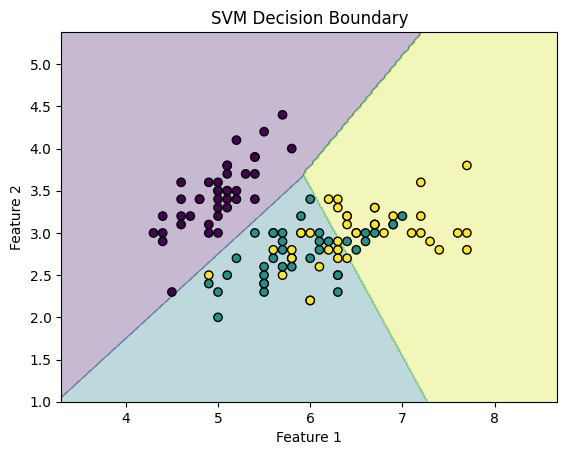

In [9]:
plot_decision_boundary(X_train, y_train, svm_model)

Was passiert bei einem linearen Kernel?

In [12]:
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [13]:
# Vorhersagen auf dem Testset
y_pred = svm_model.predict(X_test)

# Evaluierung der Genauigkeit
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9


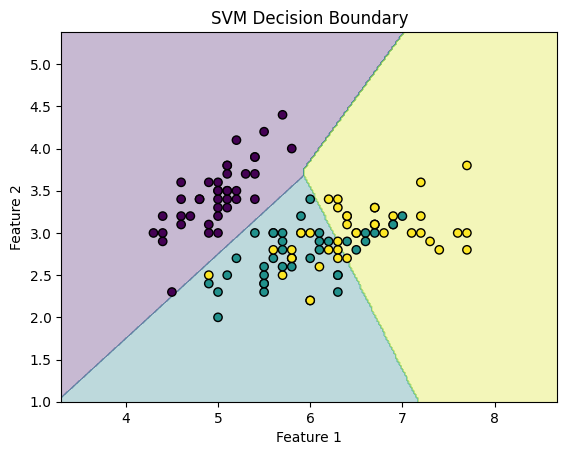

In [15]:
plot_decision_boundary(X_train, y_train, svm_model)

## Aufgabe

* Verwende nun die folgenden Datasets und versuche die bestmögliche Performance zu erreichen.
* Lade dazu das Dataset mit den bekannten Methoden (Laden mit Hilfe von `pd.read_csv`)
* Überlege, wie du bei schlechter Performance diese verbessern kannst. Zum Beipsiel: Normalisieren, Ausreißer entfernen etc.
* Müssen wir ggf. Features entfernen?
* Gehören ggf. Features mit einem Ordinal-Encoder oder mit einem Onehot-Encoder encodiert?
* Verwende für jedes Dataset eigene Code-Zellen und dokumentiere für die verschiedenen Durchläufe die Ergebnisse (zBsp. Accuracy, Confusion Matrix oder den MSE)

**Datasets:**
* Breast Cancer `breast_cancer.csv` (verwendet von https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)
* Diabetes `diabetes.csv` (verwendet von https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* Stroke Prediction `stroke.csv` (verwendet von https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

*Hinweis:* Überlege dir stets, welchen Problemtyp du verwendest und verwende dementsprechend das richtige Model! 

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
ds = pd.read_csv("../../_data/breast_cancer.csv") # ggf. etwas anders als unser bisheriges Dataset
ds = ds.dropna()
y = ds.Diagnosis
X = ds.drop('Diagnosis', axis=1)
X = X.select_dtypes(include=[np.number])

# Aufteilen der Daten in Trainings- und Testset (80% Training, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# SVM-Modell mit RBF-Kernel
svm_model = SVC(kernel='rbf', gamma='scale', C=100)
svm_model = svm_model.fit(X_train, y_train)
# Vorhersagen auf dem Testset
y_pred = svm_model.predict(X_test)

# Evaluierung der Genauigkeit
print("Accuracy:", accuracy_score(y_test, y_pred))
# plot_decision_boundary(X_train, y_train, svm_model)

svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)
# Vorhersagen auf dem Testset
y_pred = svm_model.predict(X_test)

# Evaluierung der Genauigkeit
print("Accuracy:", accuracy_score(y_test, y_pred))
# plot_decision_boundary(X_train, y_train, svm_model)

Accuracy: 0.9824561403508771
Accuracy: 0.956140350877193


In [34]:
ds = pd.read_csv("../../_data/diabetes.csv") # ggf. etwas anders als unser bisheriges Dataset
ds = ds.dropna()
y = ds.Outcome
X = ds.drop('Outcome', axis=1)
X = X.select_dtypes(include=[np.number])

# Aufteilen der Daten in Trainings- und Testset (80% Training, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# SVM-Modell mit RBF-Kernel
svm_model = SVC(kernel='rbf', gamma='scale', C=1.0)
svm_model = svm_model.fit(X_train, y_train)
# Vorhersagen auf dem Testset
y_pred = svm_model.predict(X_test)

# Evaluierung der Genauigkeit
print("Accuracy:", accuracy_score(y_test, y_pred))
# plot_decision_boundary(X_train, y_train, svm_model)

svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)
# Vorhersagen auf dem Testset
y_pred = svm_model.predict(X_test)

# Evaluierung der Genauigkeit
print("Accuracy:", accuracy_score(y_test, y_pred))
# plot_decision_boundary(X_train, y_train, svm_model)

Accuracy: 0.7662337662337663
Accuracy: 0.7532467532467533


In [23]:
ds = pd.read_csv("../../_data/stroke.csv") # ggf. etwas anders als unser bisheriges Dataset
ds = ds.dropna()
y = ds.stroke
X = ds.drop('stroke', axis=1)
X = X.select_dtypes(include=[np.number])

# Aufteilen der Daten in Trainings- und Testset (80% Training, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# SVM-Modell mit RBF-Kernel
svm_model = SVC(kernel='rbf', gamma='scale', C=1.0)
svm_model = svm_model.fit(X_train, y_train)
# Vorhersagen auf dem Testset
y_pred = svm_model.predict(X_test)

# Evaluierung der Genauigkeit
print("Accuracy:", accuracy_score(y_test, y_pred))
# plot_decision_boundary(X_train, y_train, svm_model)

svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)
# Vorhersagen auf dem Testset
y_pred = svm_model.predict(X_test)

# Evaluierung der Genauigkeit
print("Accuracy:", accuracy_score(y_test, y_pred))
# plot_decision_boundary(X_train, y_train, svm_model)

Accuracy: 0.9460285132382892
Accuracy: 0.945010183299389


In [ ]:
def plot_decision_boundary(X, y, model):
    h = .02  # Schrittweite für das Meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary')
    plt.show()